### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Obtain the Location
* For example the engineering building of Bilbao: BIZ-Bilbao > Ingenieros > Planta 1 & BIZ-Bilbao > Ingenieros > Planta 2 & BIZ-Bilbao > Ingenieros > Planta 3
BIZ-Bilbao > Ingenieros > Planta 4 & BIZ-Bilbao > Ingenieros > Planta Baja & BIZ-Bilbao > Ingenieros > Sotano 1 & BIZ-Bilbao > Ingenieros > Planta Sotano 2

* Igual tengo que incluir euiti-mop?????????????

In [2]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_DATOS
df1_location = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_DATOS.csv")

# Make a copy
df_location = df1_location.copy()

# Extract from CSV file the 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2' to obtain 'ap_name'
# 1st drop unnnecesary data
df_location.drop(labels=["id","ip_address","ip_type","type","vendor","avg_session_throughput","troughput", "interface",
"ap_mac_address","ap_ip_address","ssid","vlan","protocol","status","on_network","association_time","session_length",
"first_seen","traffic","encryption_cipher","rssi","snr","802_11u_client"], axis=1, inplace=True)

# 2nd stay only with data that 'location' = 'BIZ-Bilbao > Ingenieros > Planta 2'
df_location = df_location[(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 2')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 3')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta 4')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Planta Baja')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 1')|
(df_location["location"] == 'BIZ-Bilbao > Ingenieros > Sotano 2')]

# Show dataframe
df_location

,location,ap_name
2,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022766
7,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022650
16,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022388
53,BIZ-Bilbao > Ingenieros > Sotano 1,AP-ETSIIyT-3702-U022249
64,BIZ-Bilbao > Ingenieros > Sotano 1,AP-ETSIIyT-3702-U022249
...,...,...
69762,BIZ-Bilbao > Ingenieros > Sotano 1,AP-ETSIIyT-3702-U022652
69779,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022766
69780,BIZ-Bilbao > Ingenieros > Planta 3,AP-ETSIIyT-1702-U022400
69790,BIZ-Bilbao > Ingenieros > Planta 2,AP-ETSIIyT-1602E-U022767


### Obtain with the 'ap_name' the 'suma_troghput' & 'cuenta_de_ip_address' 

In [3]:
# Read CSV file of Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv
df1_ap = pd.read_csv("Datos_EHU_clientes_tabladinamica_anonimo_Hoja10.csv")

# Make a copy
df_ap = df1_ap.copy()

# Extract from CSV file the 'etiquetas_de_fila' of the df_location['ap_name']
# 1st save data of df_location['ap_name']
ap_name = df_location['ap_name']

# 2nd stay only the data of the 'ap_name'
df_ap_filter = df_ap[df_ap["etiquetas_de_fila"].isin(ap_name)]

# Show dataframe
df_ap_filter


,etiquetas_de_fila,suma_de_troughput,cuenta_de_ip_address
629,AP-ETSII-1142-U014278,"2124,8",44.0
630,AP-ETSIIyT-1602E-U022651,"2500,3",18.0
631,AP-ETSIIyT-1602E-U022766,"158330,4",957.0
632,AP-ETSIIyT-1602E-U022767,"73398,5",854.0
633,AP-ETSIIyT-1702-U022339,"8900,4",38.0
...,...,...,...
758,AP-ETSIIyT-3702-U022252,"6543,8",9.0
759,AP-ETSIIyT-3702-U022253,"1434,2",7.0
760,AP-ETSIIyT-3702-U022254,"1938,1",3.0
761,AP-ETSIIyT-3702-U022648,"13670,1",27.0


### Drop the unnecsary data

In [4]:
df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)

# Convert String to float of df_ap_filter['suma_de_troughput'] column
# Replace ',' of the String to be able to convert to Float
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].astype(float)

# Show info of dataframe
df_ap_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 629 to 762
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   suma_de_troughput     134 non-null    float64
 1   cuenta_de_ip_address  134 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


C:\Users\alvar\AppData\Local\Temp\ipykernel_17352\32999323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter.drop(["etiquetas_de_fila"], axis=1, inplace=True)
C:\Users\alvar\AppData\Local\Temp\ipykernel_17352\32999323.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ap_filter['suma_de_troughput'] = df_ap_filter['suma_de_troughput'].str.replace(',', '.')
C:\Users\alvar\AppData\Local\Temp\ipykernel_17352\32999323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

### Elbow method

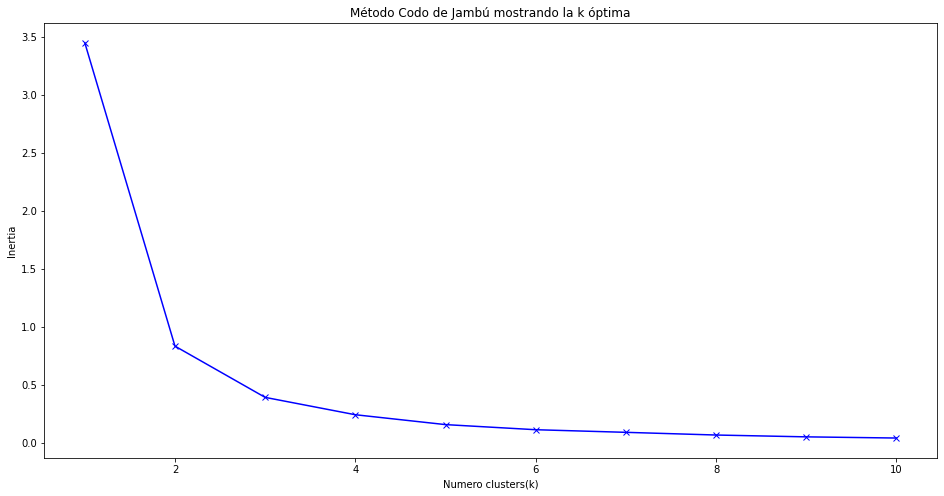

In [5]:
# Normalize data
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
normalize = min_max_scaler.fit_transform(df_ap_filter)
df_normalize = pd.DataFrame(normalize)

# Rename
df_normalize = df_normalize.rename(columns={0: 'total_devices', 1: 'bw_busy'}) #I change the name of the columns to be the same as in the data of Dublin

# Elbow method
inertia = [] 
rango = range(1,11)
for i in rango:
    algoritmo = KMeans(n_clusters=i) #default: init = k-means++, n_init = 10, max_iter = 300
    algoritmo.fit(df_normalize)
    inertia.append(algoritmo.inertia_) #Calculate: The total sum of the square inside each cluster

# Size figure
plt.figure(figsize=(16,8))

# Plot
plt.plot(rango, inertia, 'bx-')
plt.xlabel('Numero clusters(k)')
plt.ylabel('Inertia')
plt.title('Método Codo de Jambú mostrando la k óptima')

# Print plt
plt.show()

### k-means from sklearn
* With the Elbow method we obtain the optimal k is ...

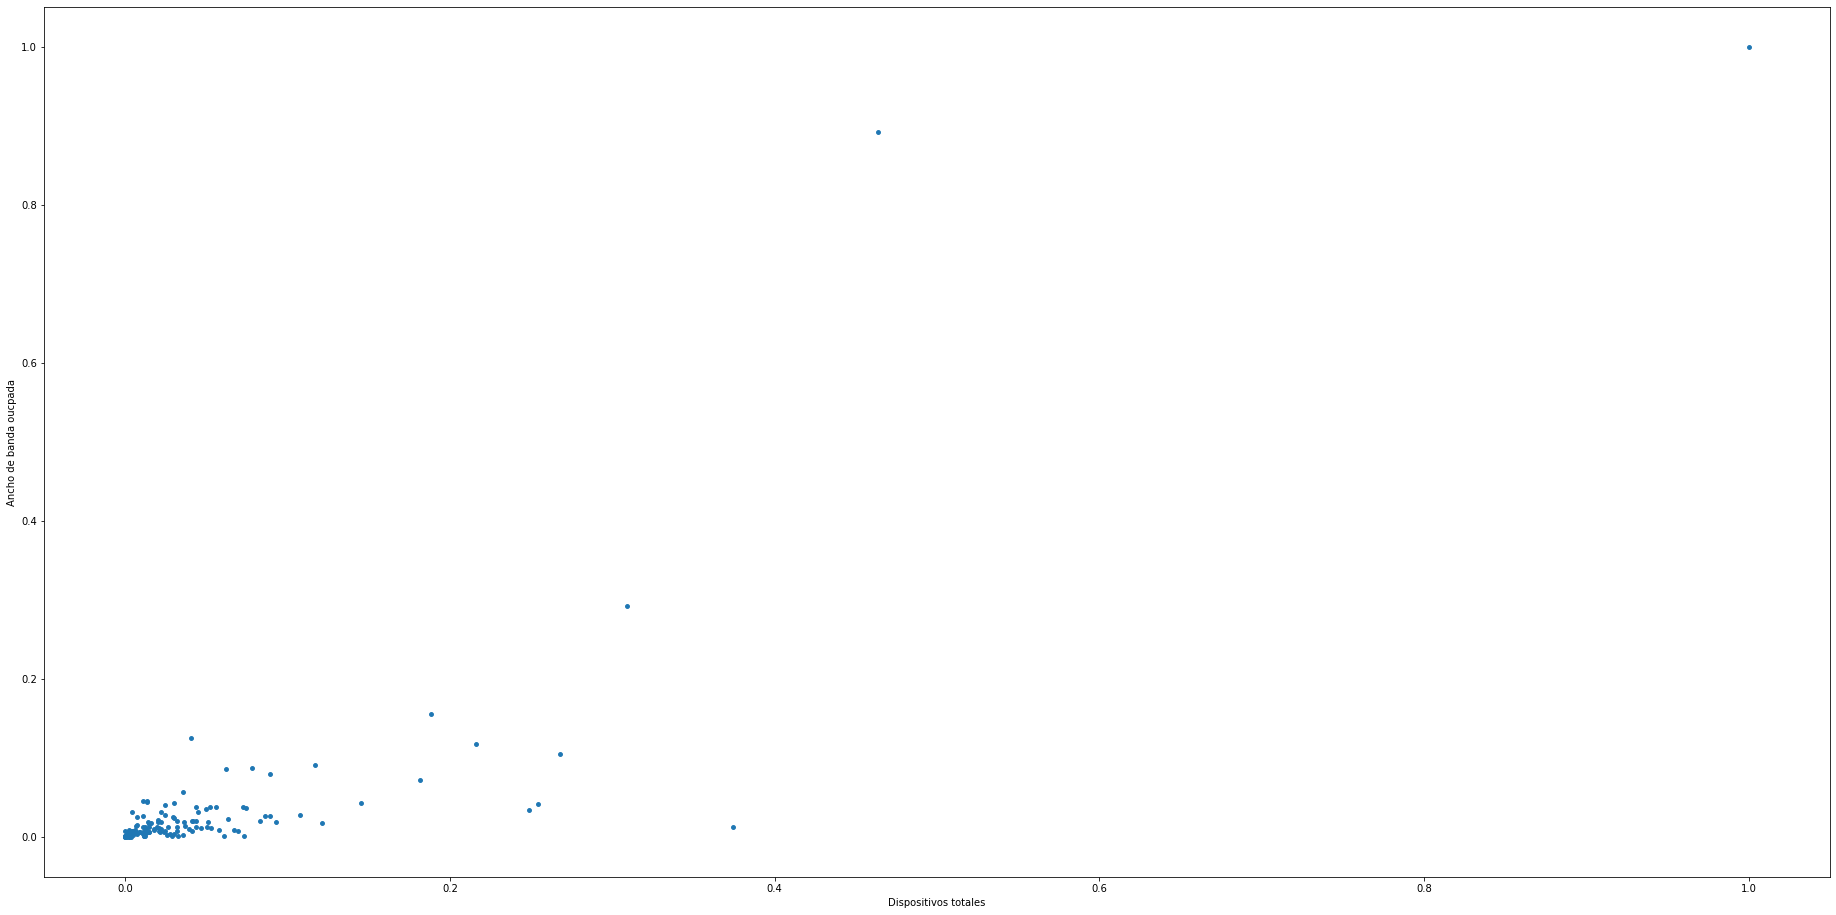

In [6]:
# Number of clusters
k = 2

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic representation of k-means clusters

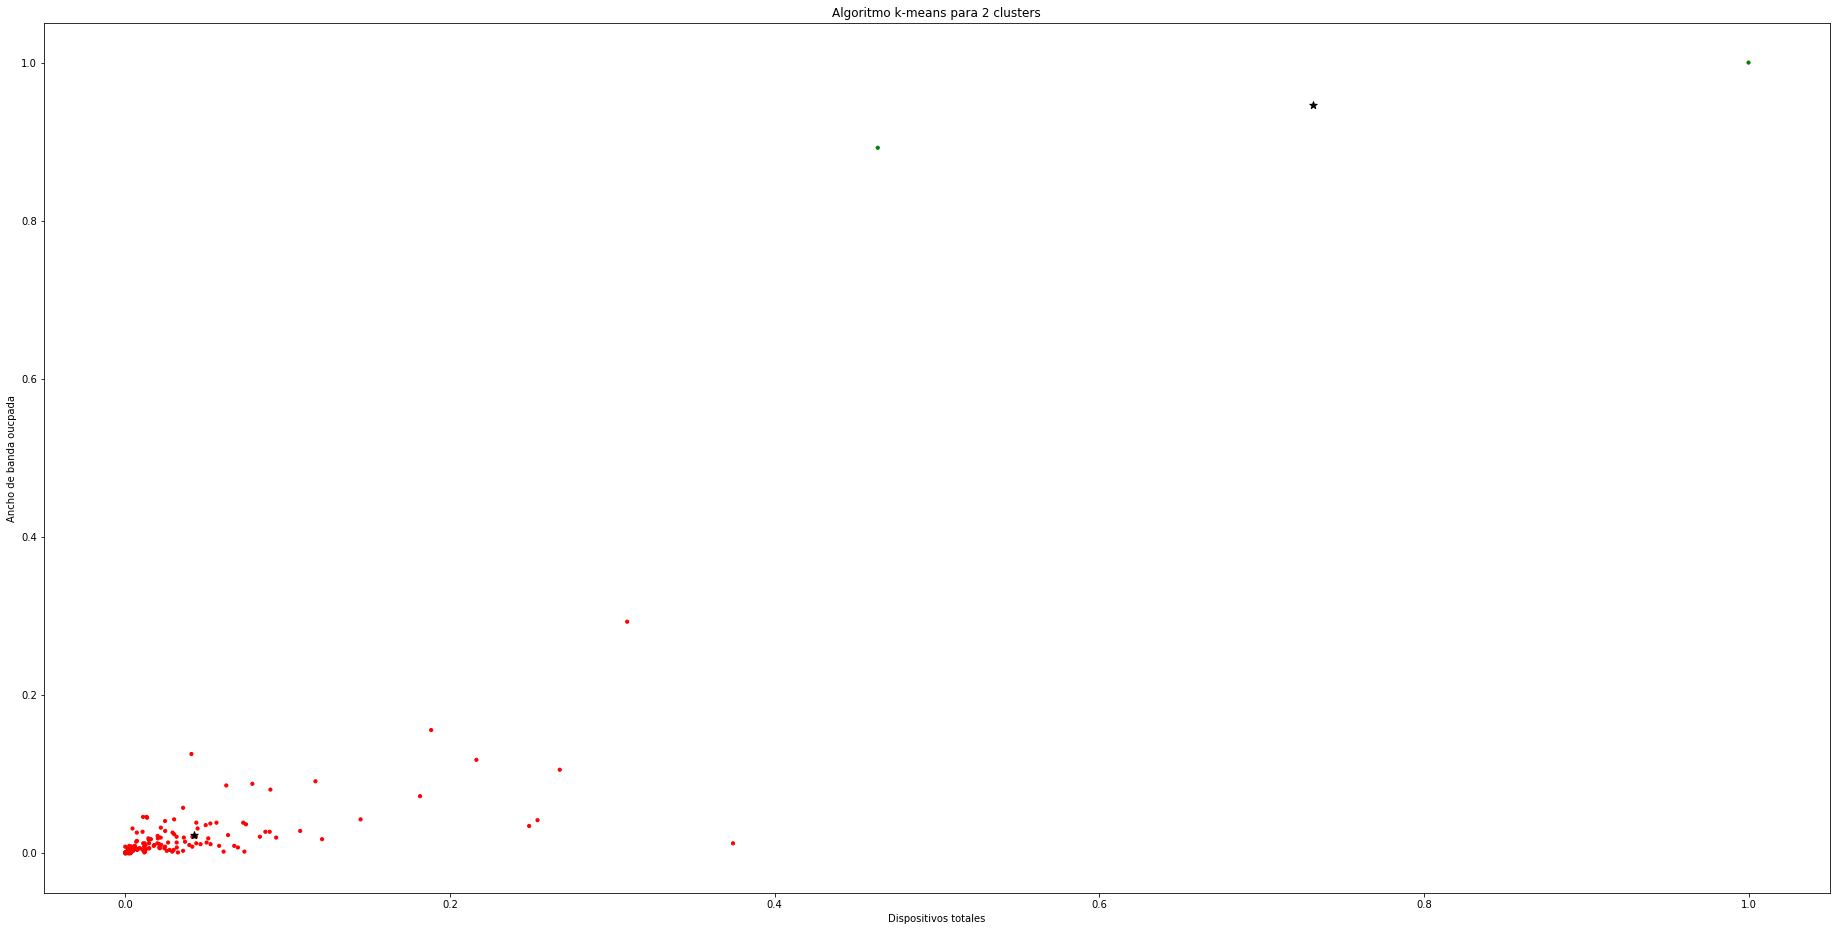

In [7]:
# Asign colors to clusters
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()

### k-means now for K = 3

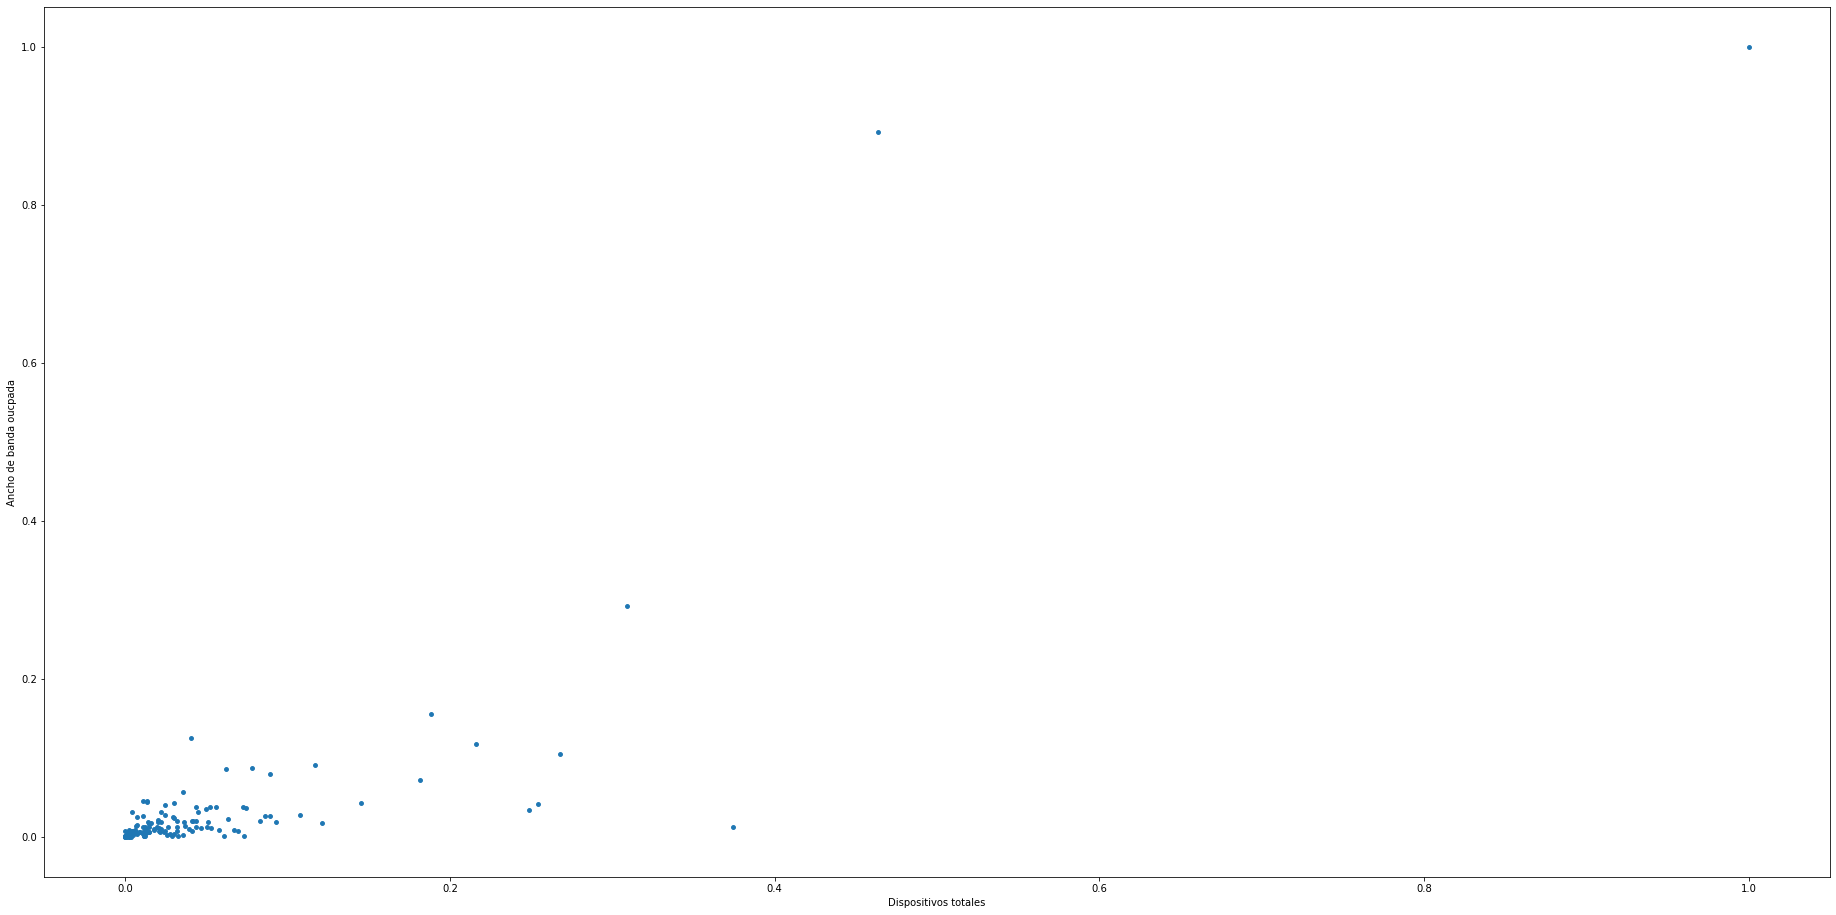

In [8]:
# Number of clusters
k = 3

# Kmeans
kmeans = KMeans(n_clusters= k) #default: init = k-means++, n_init = 10, max_iter = 300

# Labels of data
cluster = kmeans.fit_predict(df_normalize)

# Obtain centroids coordinates
centroids = kmeans.cluster_centers_

# Asign x and y
x = df_normalize['total_devices'].values
y = df_normalize['bw_busy'].values

# Print result
plt.figure(figsize=(32,16))
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.scatter(x,y, marker='.', s=60)

### Graphic represnetation of K-means clusters

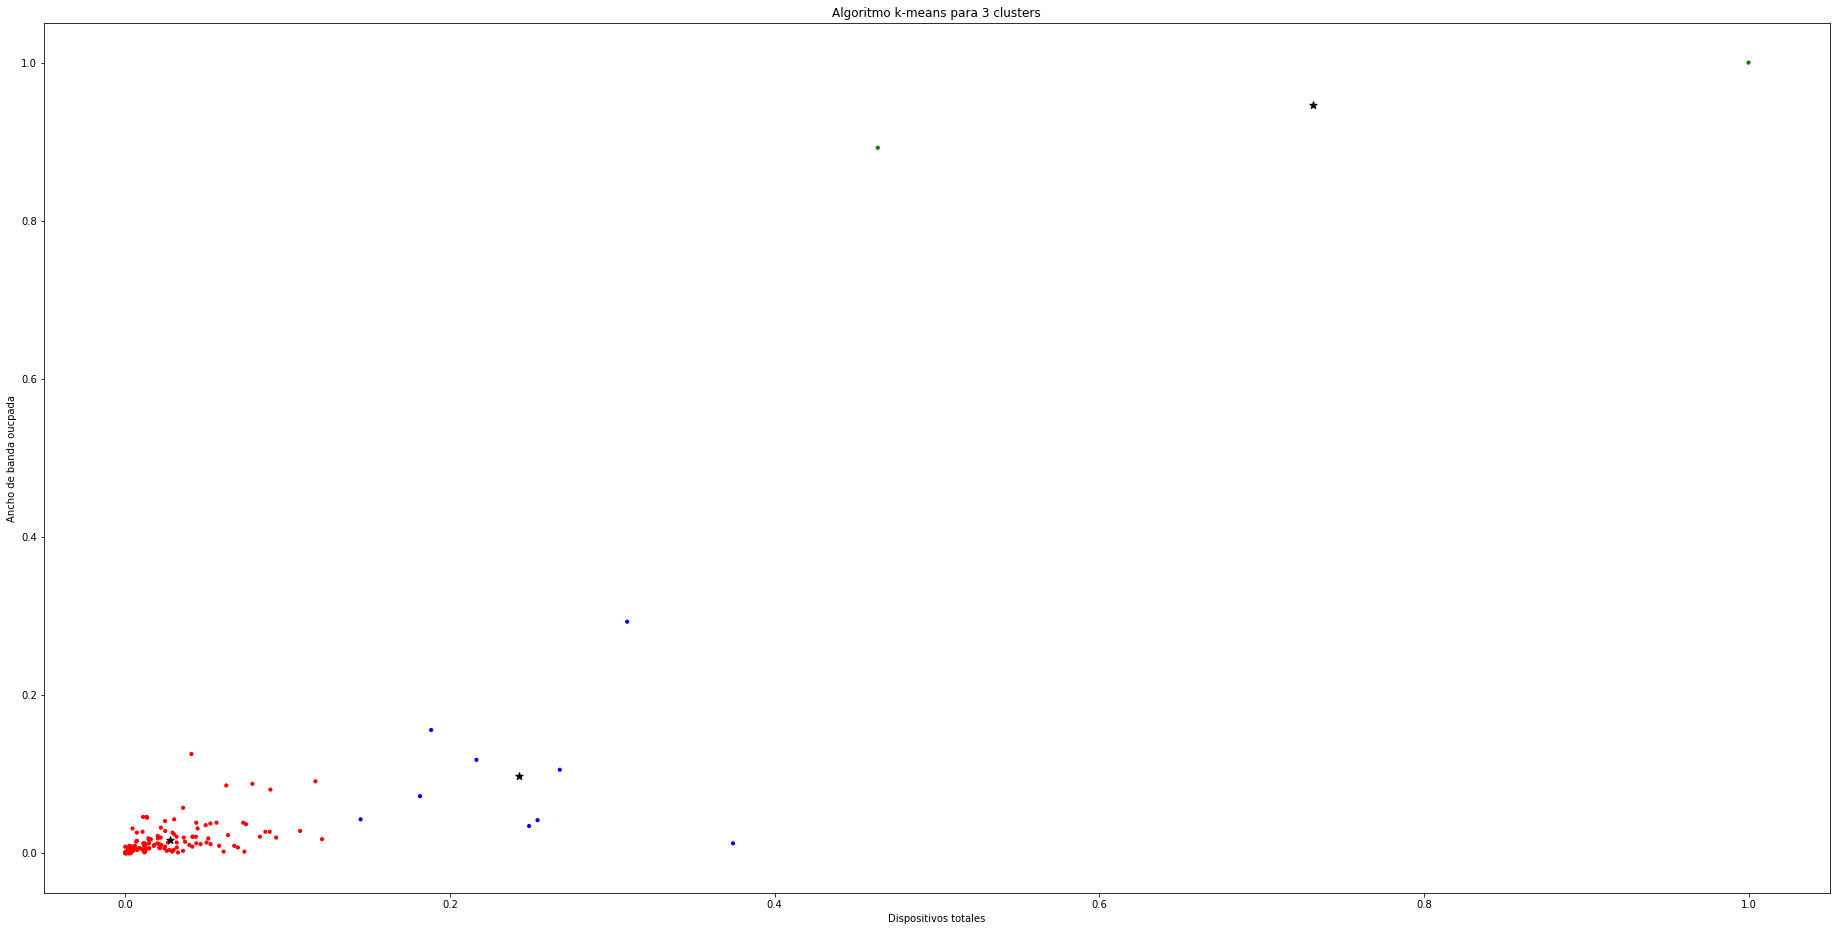

In [9]:
colors = ['red', 'green', 'blue', 'yellow'] #Number of colors = k
asign = []
for row in cluster:
    asign.append(colors[row])

# Plot size
plt.figure(figsize=(32,16))

# Plot scatter
plt.scatter(x, y, marker='.', c = asign, s=40)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=60)

# Titles of x, y and plot
plt.xlabel('Dispositivos totales')
plt.ylabel('Ancho de banda oucpada')
plt.title('Algoritmo k-means para '+str(k)+' clusters')

# Show plot
plt.show()